## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(mouse_study_merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = (mouse_study_merge_df[mouse_study_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)])

# Setup variable to hold duplicate mouse ID
duplicate_mouse_id = duplicate_data['Mouse ID'].unique()

duplicate_data[['Mouse ID','Timepoint']]



,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = (mouse_study_merge_df[mouse_study_merge_df.duplicated(subset=['Mouse ID','Timepoint'], keep = False)])
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = pd.DataFrame(mouse_study_merge_df[mouse_study_merge_df["Mouse ID"] != duplicate_mouse_id[0]])

# Reset index after clean
clean_mouse_study_df = clean_mouse_study_df.reset_index(drop=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
clean_mouse_study_group = clean_mouse_study_df.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mean_tumour_vol = clean_mouse_study_group["Tumour Volume (mm3)"].mean()
median_tumour_vol = clean_mouse_study_group["Tumour Volume (mm3)"].median()
var_tumour_vol = clean_mouse_study_group["Tumour Volume (mm3)"].var()
std_dev_tumour_vol = clean_mouse_study_group["Tumour Volume (mm3)"].std()
sem_tumour_vol = clean_mouse_study_group["Tumour Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
group_summary_df = pd.concat([mean_tumour_vol, median_tumour_vol,
                        var_tumour_vol, std_dev_tumour_vol,
                        sem_tumour_vol], axis=1)

# Rename columns for easier readability
group_summary_df.columns.values[0:5] = ("Mean of Tumour Volume", "Median of Tumour Volume", 
                                    "Variance of Tumour Volume", "STD Deviation of Tumour Volume",
                                    "SEM of Tumour Volume")
group_summary_df

,Mean of Tumour Volume,Median of Tumour Volume,Variance of Tumour Volume,STD Deviation of Tumour Volume,SEM of Tumour Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_df = clean_mouse_study_df.groupby("Drug Regimen").aggregate({
                    "Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_summary_df

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

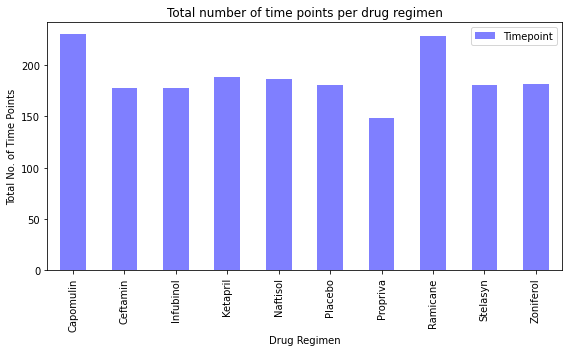

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Filter the DataFrame down only to those columns to chart
drug_and_timepoint = clean_mouse_study_df[["Drug Regimen","Timepoint"]]

# Set the index to be "Location" so they will be used as labels
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")

# Groupby and .count to get the count of timepoints per drug regimen
drug_and_timepoint = drug_and_timepoint.groupby("Drug Regimen").count()

# Generate bar plot
drug_and_timepoint.plot(kind="bar", figsize=(8,5), color='b', alpha=0.5, align="center", width = 0.5) 

# Add labels
plt.title("Total number of time points per drug regimen")
plt.ylabel("Total No. of Time Points")

plt.tight_layout()
plt.show()


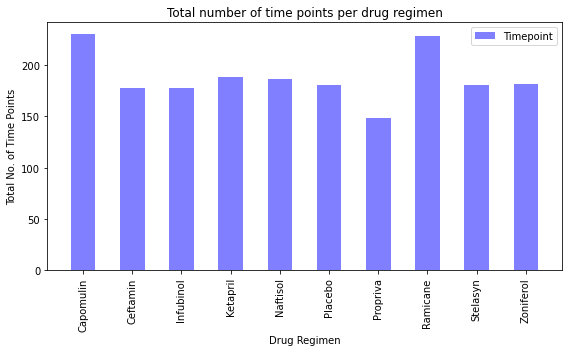

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Create series for x and y axis
x_axis = np.arange(clean_mouse_study_df["Drug Regimen"].nunique())
y_axis = clean_mouse_study_df.groupby("Drug Regimen")["Timepoint"].count()


# generate bar plot
plt.figure(figsize=(8,5))
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center", width = 0.5)

# Setup name list to update the names on x axis
x_axis_names = sorted(clean_mouse_study_df["Drug Regimen"].unique())
plt.xticks(x_axis, x_axis_names, rotation="vertical")


# Add labels, setup legend label list and add legend
plt.title("Total number of time points per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total No. of Time Points")
time_points = ["Timepoint"]
plt.legend(labels = time_points, loc= "upper right")


plt.tight_layout()
plt.show()

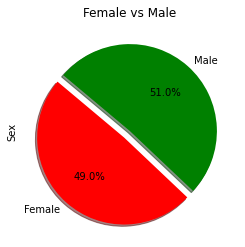

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Labels for the sections of our pie chart
sex_label = clean_mouse_study_df["Sex"].unique()
sex_label.sort()

# The values of each section of the pie chart
qty_of_sex = clean_mouse_study_df.groupby("Sex")["Sex"].count()


# The colours of each section of the pie chart
lst_colours = ["red", "green"]

# Tells matplotlib to separate the "Female" section from the others
tup_explode = (0.1, 0.0)

# Generate a pie plot
sex_chart = qty_of_sex.plot(kind="pie", autopct="%1.1f%%", 
                            title="Female vs Male", labels=sex_label, 
                            colors=lst_colours, explode=tup_explode, 
                            shadow=True, startangle=140)
    
plt.show()

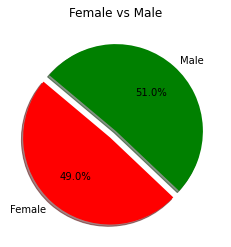

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Creates the pie chart based upon the values in previous step
plt.pie(qty_of_sex, labels=sex_label, colors=lst_colours,
        autopct="%1.1f%%", explode=tup_explode, shadow=True, startangle=140)

# Add title
plt.title("Female vs Male")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max_tumor = clean_mouse_study_df.groupby("Mouse ID").max()[["Drug Regimen","Timepoint"]]
grouped_max_tumor = grouped_max_tumor.loc[(grouped_max_tumor["Drug Regimen"] == "Capomulin") | 
                                           (grouped_max_tumor["Drug Regimen"] == "Ramicane") | 
                                           (grouped_max_tumor["Drug Regimen"] == "Infubinol") | 
                                           (grouped_max_tumor["Drug Regimen"] == "Ceftamin")]

# Rename column
grouped_max_tumor = grouped_max_tumor.rename(columns={"Timepoint": "Max Timepoint"})

# Drop "Timepoint" column
grouped_max_tumor = grouped_max_tumor["Max Timepoint"]

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
clean_mouse_study_with_max_df = pd.merge(clean_mouse_study_df, grouped_max_tumor, on="Mouse ID")


In [14]:
# Put treatments into a list
treatment_list = clean_mouse_study_with_max_df["Drug Regimen"].unique()
treatment_list = treatment_list.tolist()

# Create empty list to fill with tumour vol data (for plotting)
# Capomulin, Ramicane, Infubinol, and Ceftamin
ram_tumour_vol_list = []
cap_tumour_vol_list = []
inf_tumour_vol_list = []
cef_tumour_vol_list = []


# Combine tumour vol data lists into a single list

data = [ram_tumour_vol_list, cap_tumour_vol_list, inf_tumour_vol_list, cef_tumour_vol_list]
        
#data_dictionary = {treatment_list[i]: data[i] for i in range(len(treatment_list))}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
for x in clean_mouse_study_with_max_df.index:
    
    # Grab data on each row and add to a variable
    drug = clean_mouse_study_with_max_df["Drug Regimen"].iloc[x]
    tum_vol = clean_mouse_study_with_max_df["Tumour Volume (mm3)"].iloc[x]
    timep = clean_mouse_study_with_max_df["Timepoint"].iloc[x]
    max_timep = clean_mouse_study_with_max_df["Max Timepoint"].iloc[x]
    
    # Check if the timepoint matches the max timepoint and then apend relevant list
    if (drug == "Ramicane") & (timep == max_timep):
        ram_tumour_vol_list.append(tum_vol)
    elif (drug == "Capomulin") & (timep == max_timep):
        cap_tumour_vol_list.append(tum_vol)
    elif (drug == "Infubinol") & (timep == max_timep):
        inf_tumour_vol_list.append(tum_vol)
    elif (drug == "Ceftamin") & (timep == max_timep):
        cef_tumour_vol_list.append(tum_vol)
    

# Iterate through each list to caculate Quartiles, IQR and upper and lower bounds
for idx, x in enumerate(data):
    
    q3, q1 = np.percentile(data[idx], [75 ,25])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    
    
    # Print results
    print(f"The lower quartile of {treatment_list[idx]} data is: {q1}.")
    print(f"The upper quartile of {treatment_list[idx]} data is: {q3}.")
    print(f"The interquartile range of {treatment_list[idx]} data is {iqr}.")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print()
    
    # Determine outliers using upper and lower bounds by
    # Iterating through all items within each list
    for x in data[idx]:
        if x >= upper_bound:
            print(f"Value {x} could be an outlier")
        if x <= lower_bound:
            print(f"Value {x} could be an outlier")
    print()
    print("-------------------")


The lower quartile of Ramicane data is: 31.56046955.
The upper quartile of Ramicane data is: 40.65900627.
The interquartile range of Ramicane data is 9.098536719999998.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


-------------------
The lower quartile of Capomulin data is: 32.37735684.
The upper quartile of Capomulin data is: 40.1592203.
The interquartile range of Capomulin data is 7.781863460000004.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


-------------------
The lower quartile of Infubinol data is: 54.04860769.
The upper quartile of Infubinol data is: 65.52574285.
The interquartile range of Infubinol data is 11.477135160000003.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Value 36.321345799999996 could be an outlier

-------------------
The lower quartile of Ceftamin data is: 48.72207785.
The upper quartile of Ceftamin dat

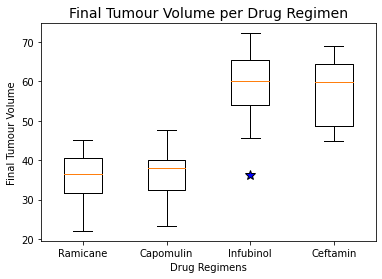

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest

fig7, ax7 = plt.subplots()

# Create vaiable to hold customised outlier specs for potentil outliers
blue_star = dict(markerfacecolor='b', marker='*', markersize=10)

# Generate a box plot
ax7.boxplot(data, flierprops=blue_star, labels=treatment_list)

# Add x label, y label and title
ax7.set_title('Final Tumour Volume per Drug Regimen', fontsize=14)
ax7.set_ylabel("Final Tumour Volume")
ax7.set_xlabel("Drug Regimens")

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
